In [3]:
import pandas as pd
import numpy as np

In [4]:
df  = pd.read_csv(r"C:\Users\nirma\Downloads\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
df.shape

(30, 2)

In [6]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [28]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=2,max_leaf_nodes=5)

In [29]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=5)

In [30]:
y_pred = dt.predict(x_test)

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [32]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(y_test,y_pred)

In [33]:
f"The performance of model is mse : {mse} , mae : {mae}, r2_score: {r2}, rmse:{rmse}"

'The performance of model is mse : 20864369.421296302 , mae : 4086.5138888888887, r2_score: 0.9794417566919503, rmse:2     194.244691\n28    349.844251\n13    238.916303\n10    251.431899\n26    342.007310\n24    330.803567\n27    335.611382\n11    236.207536\nName: Salary, dtype: float64'

In [34]:
import pickle
with open ('decisiontree.pkl','wb') as z:
    pickle.dump(dt,z)

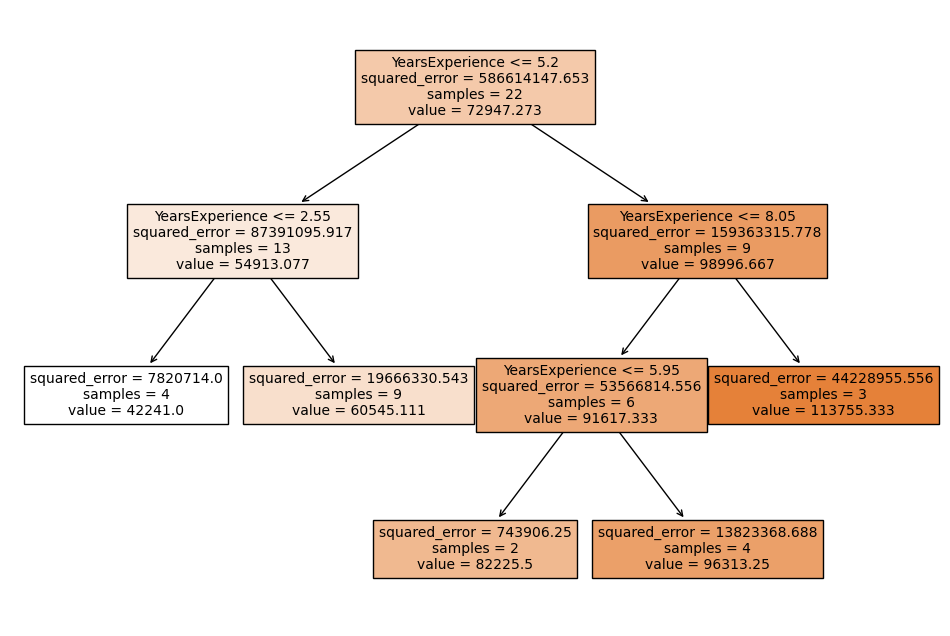

In [35]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize = (12,8))
tree.plot_tree(dt,filled = True,feature_names=x.columns,fontsize=10)
plt.show()